# __Group Assignment__

__Submission Date:__ 26/03/2025

__Assignment: NLP-2024-2025: Assignment 1__

__Group Members:__
- ANZALONE Gabriel
- MBENGUE Ndèye Arame

__Firm level topic of discussion:__ Technological Disruption

__Task__ : Measuring <u>Technological Disruption</u> with transcripts of Conference Calls.

### __1.1- Data Preparation and Text Cleaning__

In [2]:
# Code for Github
!pip install pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 92.2 MB/s eta 0:00:00:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
# Code for Github
! pip install nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 52.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
# Code for Github
!pip install statsmodels

#### __1.1.A- Loading data__

Management Presentations are the prepared, structured parts of the calls where management outlines key points. They tend to reflect the firm's official narrative on issues such as technological disruption.

Q&A Sessions are more spontaneous and can reveal additional insights or clarifications that may not be in the prepared presentation. They might capture unexpected concerns or deeper discussions on technology topics that aren’t as polished.

__We decided to go with both to ensure a certain level of robustness to our measure.__

In [3]:
import pandas as pd
# We import Earnings Calls and Q&A sessions of S&P500 from 2015 to 2021

# Loading Earning calls 
Sample_EC = pd.read_csv("https://www.dropbox.com/scl/fi/2p7ahxroqj9pwf98ni5an/Sample_Calls.csv?rlkey=zfieicvz891u4e3z0aroeg0u7&dl=1")

# Loading Presentations
Sample_Presentations = pd.read_feather("https://www.dropbox.com/scl/fi/uceh2xva5g4apbmt92cgt/Sample_Calls_Presentations.feather?rlkey=ln4nzsa4nenqyvm0pg2cur9sp&dl=1")

# Loading Q&As
Sample_QAs = pd.read_feather("https://www.dropbox.com/scl/fi/iq4111nlmsykp2tzxk9xg/Sample_Calls_QA.feather?rlkey=xabjqmwhesx05jivrlfzkgj6m&dl=1")

In [4]:
Sample_Presentations.head()

,file_name,presentation
0,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,Good day and welcome to the Linear Technol...
1,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,Welcome to Cerner Corporation's first quar...
2,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,Welcome to Cerner Corporation's second qua...
3,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,Welcome to Cerner Corporation's third quar...
4,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2017...,Welcome to Cerner Corporation's fourth qua...


In [5]:
Sample_QAs.head()

,QA,speaker_name,file_name,QA_text,QA_number
0,q,david wong,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,"Thanks very much. Don, could you give us some ...",1
1,a,don zerio,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,"Yes, David, as you know we retired our convert...",1
2,q,david wong,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,"Great, thanks.",2
3,q,craig hettenbach,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,Great thank you. Just a question on the commen...,3
4,a,lothar maier,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,"When you think about China you know, particula...",3


#### __1.1.B- Filtering the data__

In [6]:
# filtering for answers only for the Q&A
temp = Sample_QAs[Sample_QAs['QA'] == 'a']

# Aggregating Answers by file_name
temp = temp.groupby('file_name')['QA_text'].apply(lambda x: ' '.join(x)).reset_index()

# Merging Back into the Main Dataset
Sample_answers = Sample_EC.merge(temp)

In [7]:
Sample_answers

,GVKEY,date_rdq,co_conm,file_name,CAR-11-Carhart,CAR-11-ff3,CAR01-Carhart,CAR01-ff3,IV,hvol,...,niq,epspxq,epspiq,dlttq,dlcq,prccq,cshoq,dvpq,xintq,QA_text
0,16101.0,2016-07-29 13:00:00+00:00,ABBVIE INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,0.011886,0.014261,0.014261,0.021246,0.179151,0.129186,...,1610.0,0.99,0.99,37328.0,517.0,61.91,1628.542,0.0,245.0,"Jeff, this is Rick. I will cover the first and..."
1,16101.0,2016-04-28 13:00:00+00:00,ABBVIE INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,0.026387,0.023499,0.023499,0.021770,0.289777,0.114447,...,1354.0,0.83,0.83,29490.0,2423.0,57.12,1617.359,0.0,215.0,"Okay. Hi, Jeff, it's Rick. So I'll take I gues..."
2,16101.0,2016-10-28 13:00:00+00:00,ABBVIE INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,-0.078668,-0.079290,-0.079290,-0.092594,0.253269,0.381002,...,1598.0,0.97,0.97,37284.0,26.0,63.07,1624.908,0.0,271.0,"Sure, Jami; this is Rick. Thank you for the qu..."
3,16101.0,2017-01-27 14:00:00+00:00,ABBVIE INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2017...,-0.010152,-0.000737,-0.000737,-0.005279,0.182080,0.145941,...,1391.0,0.85,0.85,36440.0,402.0,62.62,1592.513,0.0,277.0,"Hi, Jami; it's Bill. So on your operating marg..."
4,16101.0,2017-04-27 13:00:00+00:00,ABBVIE INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2017...,0.010397,0.010672,0.010672,0.012819,0.192822,0.112189,...,1711.0,1.07,1.07,36526.0,425.0,65.16,1591.366,0.0,273.0,"Yes. Well, first, thanks for the question. May..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872,189491.0,2016-11-01 13:00:00+00:00,XYLEM INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,-0.022716,-0.023069,-0.023069,-0.015313,0.238038,0.176583,...,73.0,0.41,0.41,1148.0,62.0,52.45,179.400,0.0,12.0,"Yes, well, thanks for the question, Jim. First..."
2873,189491.0,2016-08-02 13:00:00+00:00,XYLEM INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...,-0.036201,-0.034737,-0.034737,-0.037363,0.201698,0.213624,...,71.0,0.39,0.39,1143.0,91.0,44.65,179.200,0.0,12.0,"Sure, Deane. Let me just characterize what we ..."
2874,189491.0,2020-07-30 13:00:00+00:00,XYLEM INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2020...,-0.030116,-0.028020,-0.028020,-0.049431,0.325614,0.345711,...,31.0,0.17,0.17,3031.0,269.0,64.96,180.000,0.0,18.0,"That is correct, Dean, on both counts. Sure. Y..."
2875,189491.0,2018-05-01 13:00:00+00:00,XYLEM INC,Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2018...,-0.066260,-0.064927,-0.064927,-0.058477,0.206359,0.215869,...,79.0,0.44,0.44,2228.0,371.0,76.92,179.500,0.0,21.0,"Yes, I'll go first here, Nate. And I think the..."


In [8]:
# Filtering Presentations
Sample_Presentations = Sample_Presentations[
    Sample_Presentations['presentation'].str.split().apply(len) > 50 # filter to keep presentations with at least 50 words and to remove noise
].reset_index(drop=True)

# Grouping by file_name and concatenating presentation column (concatenating all text belonging to the same call into one large text entry)
Pres = Sample_Presentations.groupby("file_name")["presentation"].agg(lambda x: " ".join(x)).reset_index()
Pres.columns= ["file_name","text"]


#### __1.1.C- Prep-processing Textual Data__

In [9]:
# librairies
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize #breaking text into words
from nltk.stem import WordNetLemmatizer #reducing words to their base form

# Downloading data 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# We first tokenize words & remove the stopwords
stop_words = set(stopwords.words('english')) # preprocessing all words, removing the stopwords and using tokenization

def preprocess_text(text):
    tokens = word_tokenize(text.lower()) # putting all in lowercase format
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return tokens

Pres['tokens'] = Pres['text'].apply(preprocess_text)

Sample_answers['tokens'] = Sample_answers['QA_text'].apply(preprocess_text)

In [11]:
# Then we lemmatize to have a unified format
# Either use WordNetLemmatizer or Spacy -> better to use the latter to take the context of each word into account (POS Tagging)
# But it is way Longer than WordNet to run

lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

Pres['tokens'] = Pres['tokens'].apply(lemmatize_text)

Sample_answers['tokens'] = Sample_answers['tokens'].apply(lemmatize_text)

In [12]:
Pres['tokens'].head(10)

0    [lady, gentleman, thank, standing, welcome, fi...
1    [welcome, prudential, quarterly, earnings, cal...
2    [lady, gentleman, thank, standing, welcome, pr...
3    [lady, gentleman, thank, standing, welcome, q1...
4    [lady, gentleman, thank, standing, welcome, q2...
5    [thank, tom, good, morning, everyone, welcome,...
6    [welcome, southwest, airline, second, quarter,...
7    [thank, tom, good, morning, everyone, welcome,...
8    [lady, gentleman, thank, standing, welcome, an...
9    [lady, gentleman, thank, standing, welcome, an...
Name: tokens, dtype: object

In [13]:
Sample_answers['tokens'].head(10)

0    [jeff, rick, cover, first, third, one, mike, c...
1    [okay, hi, jeff, rick, take, guess, question, ...
2    [sure, jami, rick, thank, question, think, loo...
3    [hi, jami, bill, operating, margin, question, ...
4    [yes, well, first, thanks, question, maybe, le...
5    [okay, jami, thanks, much, question, try, take...
6    [okay, mike, maybe, start, talking, rate, cove...
7    [right, jami, rick, first, thank, compliment, ...
8    [right, thanks, jami, rick, appreciate, questi...
9    [rick, take, first, question, mike, cover, sec...
Name: tokens, dtype: object

In [14]:
Pres['text'].isnull().sum() # 0 null value

0

In [15]:
Sample_answers['QA_text'].isnull().sum() # 0 null value

0

### __1.2 - Measure Construction : Analysis & Market Reaction__

We decided to focus on the presentations first and then we could perform a parallel analysis with the Q&A texts to see if there are any notable differences in how technological disruption is discussed.

### __1.2.A - Intuitive (Naïve) method__ 

In [16]:
# We start with a set of seed words known to capture the essence of technological disruption

tech_dict = [
    "disrupt", "disruption",
    "innovate", "innovation",
    "digitize", "digital",
    "automation", "automate",
    "artificial", "intelligence",
    "machine", "learning",
    "blockchain", "cyber", 
    "robot", "iot", "tech"
]

In [17]:
# computing the score 
# We’ll define a function that takes the list of tokens for a given transcript and returns the frequency (or proportion) of tokens that are in our technology dictionary

def tech_score(tokens, tech_words):
    # Avoid division by zero
    if len(tokens) == 0:
        return 0
    # Count how many tokens are in the technology dictionary
    count = sum(1 for token in tokens if token in tech_words)
    # Return the proportion of tech-related words
    return count / len(tokens)


In [18]:
Pres['tech_score'] = Pres['tokens'].apply(lambda tokens: tech_score(tokens, tech_dict))
print(Pres[['file_name', 'tech_score']].head(10))

                                           file_name  tech_score
0  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...    0.000000
1  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...    0.000000
2  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...    0.000000
3  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...    0.001849
4  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...    0.002694
5  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...    0.000000
6  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...    0.000000
7  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...    0.000000
8  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...    0.000000
9  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...    0.000000


__Merging with Firm-Level Data and Creating Quarter-Level Aggregates:__

We merge the presentation data (with our computed tech_score) with firm-level metadata from Sample_EC (which contains firm identifiers and the reporting date). Then, we convert the reporting date into a quarterly period and calculate the average disruption measure for each firm and quarter.

In [19]:
# Merge Pres (which has file_name and tech_score) with firm metadata
merged = pd.merge(
    Pres,
    Sample_EC[['file_name', 'GVKEY', 'co_conm', 'date_rdq', 'CAR-11-Carhart', 'SurpDec', 'IV']],
    on='file_name',
    how='left'
)


# Convert the reporting date to datetime and extract the quarter
merged['date_rdq'] = pd.to_datetime(merged['date_rdq'])
merged['quarter'] = merged['date_rdq'].dt.to_period('Q')

# Now, group by firm and quarter and calculate the average tech_score
firm_quarter = merged.groupby(['co_conm', 'quarter'])['tech_score'].mean().reset_index()

# Display the resulting DataFrame
print(firm_quarter.head())


      co_conm quarter  tech_score
0  ABBVIE INC  2016Q2    0.000327
1  ABBVIE INC  2016Q3    0.000000
2  ABBVIE INC  2016Q4    0.000000
3  ABBVIE INC  2017Q1    0.000000
4  ABBVIE INC  2017Q2    0.000000


/tmp/ipykernel_49112/3553359598.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged['quarter'] = merged['date_rdq'].dt.to_period('Q')


__Sorting Firms by Their Tech Score:__
    
We explore which firms have the highest or lowest technological disruption scores in a given quarter. 

In [20]:
# Sort the firm_quarter DataFrame by tech_score in descending order
sorted_firms = firm_quarter.sort_values(by='tech_score', ascending=False)
print("Top firms with high technological disruption score:")
print(sorted_firms.head(10))

print("\nFirms with low technological disruption score:")
print(sorted_firms.tail(10))

Top firms with high technological disruption score:
                       co_conm quarter  tech_score
622   COGNIZANT TECH SOLUTIONS  2017Q4    0.029772
621   COGNIZANT TECH SOLUTIONS  2017Q3    0.029437
619   COGNIZANT TECH SOLUTIONS  2017Q1    0.026060
624   COGNIZANT TECH SOLUTIONS  2018Q2    0.024725
1828           NIKE INC  -CL B  2020Q4    0.024182
620   COGNIZANT TECH SOLUTIONS  2017Q2    0.023854
625   COGNIZANT TECH SOLUTIONS  2018Q3    0.023284
1827           NIKE INC  -CL B  2020Q3    0.021989
623   COGNIZANT TECH SOLUTIONS  2018Q1    0.021947
1821           NIKE INC  -CL B  2019Q1    0.021900

Firms with low technological disruption score:
                     co_conm quarter  tech_score
1453        LILLY (ELI) & CO  2018Q4         0.0
1665   MONSTER BEVERAGE CORP  2016Q4         0.0
1669   MONSTER BEVERAGE CORP  2017Q4         0.0
1671   MONSTER BEVERAGE CORP  2018Q2         0.0
1672   MONSTER BEVERAGE CORP  2018Q3         0.0
1673   MONSTER BEVERAGE CORP  2018Q4         

__Visualizing the Aggregate Trend Over Time:__

We wan to see how the average technological disruption discussion evolves over time. To dos so, we compute the average tech score for each quarter across all firms and then plot a time series.

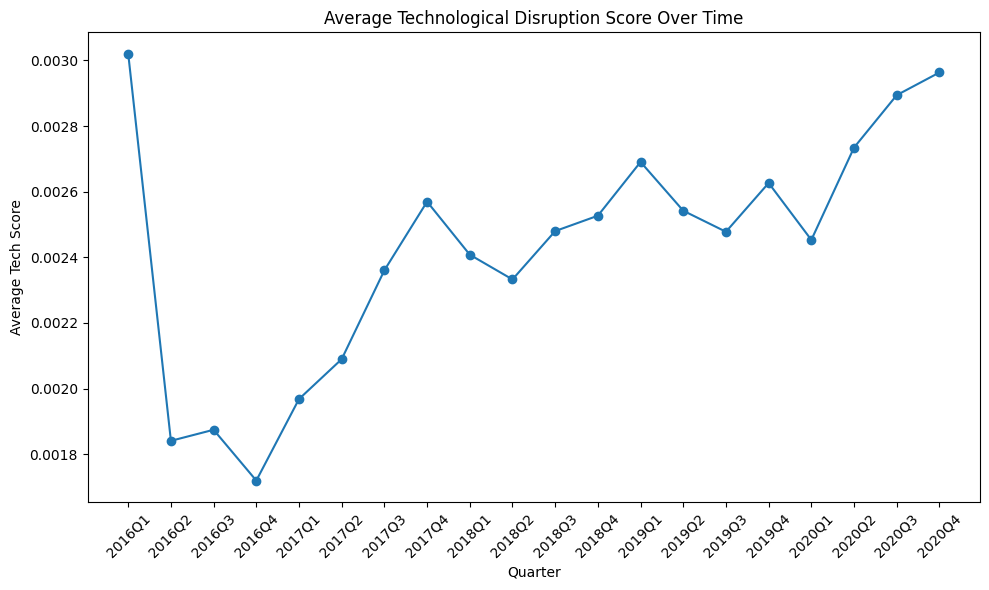

In [ ]:
import matplotlib.pyplot as plt

# Group by quarter and calculate the average tech_score
agg_quarter = merged.groupby('quarter')['tech_score'].mean().reset_index()

# Convert quarter to string for better plotting on the x-axis
agg_quarter['quarter_str'] = agg_quarter['quarter'].astype(str)

plt.figure(figsize=(10,6))
plt.plot(agg_quarter['quarter_str'], agg_quarter['tech_score'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title("Average Technological Disruption Score Over Time Using Naïve Method")
plt.xlabel("Quarter")
plt.ylabel("Average Tech Score")
plt.grid(False)
plt.tight_layout()
plt.show()


__Linking the Disruption Measure to Market Reaction:__

Our Sample_EC dataset contains market reaction variables such as CAR-11-Carhart and others. 
We can investigate whether firms that discuss technological disruption more tend to experience different market reactions. For instance, we can run a regression where the dependent variable is the abnormal return (CAR-11-Carhart), and the independent variable is your tech_score. We also decided to add control variables such as earnings surprises SurpDec later on.

In [22]:
import statsmodels.api as sm

# Drop any rows with missing values in the variables of interest
analysis_data = merged.dropna(subset=['CAR-11-Carhart', 'tech_score'])

# Define the independent and dependent variables
X = analysis_data[['tech_score']]  # You can add more controls like 'SurpDec' if desired
y = analysis_data['CAR-11-Carhart']

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Fit the OLS regression model
ols_model = sm.OLS(y, X).fit()

# Print the regression summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:         CAR-11-Carhart   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.342
Date:                Mon, 24 Mar 2025   Prob (F-statistic):             0.0676
Time:                        17:15:36   Log-Likelihood:                 3894.3
No. Observations:                2816   AIC:                            -7785.
Df Residuals:                    2814   BIC:                            -7773.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0020      0.001     -1.390      0.1

Looking at the table, we see that the independent variable (tech_score) explains only 0.1% of the variation in the dependent variable (CAR-11-Carhart). This is very low, suggesting that tech_score is not a strong predictor of CAR-11-Carhart with this measure.


The P-value of tech_score (0.068) indicates that tech_score is not statistically significant at the typical 5% level (0.05). It suggests that there is not enough evidence to conclude that tech_score has a meaningful effect on market reaction. Futhermore, The F-test evaluates the overall significance of the regression model. A p-value of 0.0676 is slightly above the 0.05 threshold, meaning the overall model is not statistically significant at the 5% level.
__This model does not provide a meaningful baseline for predicting CAR-11-Carhart.__




The regression output will show us if there is a statistically significant relationship between the discussion of technological disruption and market reaction. A significant coefficient (either positive or negative) on the tech_score could indicate that investors respond to the level of technological disruption discussion in earnings calls.

__Scatter Plot of Tech Score vs. CAR__


/tmp/ipykernel_49112/2312366390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_data['quarter_str'] = analysis_data['quarter'].astype(str)


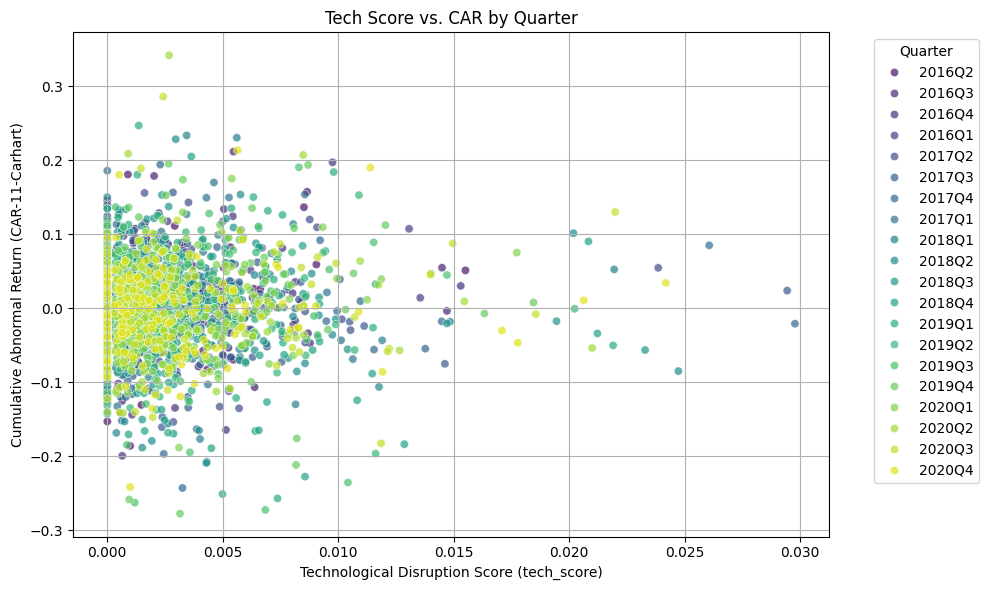

In [23]:
# Convert quarter to a categorical variable (if not already)
analysis_data['quarter_str'] = analysis_data['quarter'].astype(str)

# Create a color mapping for different quarters
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=analysis_data, x='tech_score', y='CAR-11-Carhart', hue='quarter_str', palette='viridis', alpha=0.7)
plt.xlabel("Technological Disruption Score (tech_score)")
plt.ylabel("Cumulative Abnormal Return (CAR-11-Carhart)")
plt.title("Tech Score vs. CAR by Quarter")
plt.grid(True)
plt.legend(title="Quarter", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


The data points appear widely scattered without a clear trend. This aligns with the low R-squared in our regression results, indicating that tech_score explains almost none of the variation in CAR.

__Incorporating Further Control Variables:__

As said prior, we will account for SurpDec (scaled earnings surprise), as firms with bigger surprises might have different market reactions, and implied volatility (IV) to capture the overall market risk environment or firm-specific uncertainty that could influence abnormal returns.

In [36]:


# Ensure that the additional control columns are present in the merged dataframe.
# For example, let's assume 'SurpDec' and 'IV' are available in Sample_EC and have been merged accordingly.
# You might need to adjust the merge step to include these variables.

# Drop rows with missing values in the variables of interest:
analysis_data = merged.dropna(subset=['CAR-11-Carhart', 'tech_score', 'SurpDec', 'IV'])

# Define your independent variables (including the tech score and controls)
control_vars = ['tech_score', 'SurpDec', 'IV']
X = analysis_data[control_vars]
y = analysis_data['CAR-11-Carhart']

# Add a constant term
X = sm.add_constant(X)

# Fit the regression model
model_controls = sm.OLS(y, X).fit()
print(model_controls.summary())


                            OLS Regression Results                            
Dep. Variable:         CAR-11-Carhart   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     67.52
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           3.89e-42
Time:                        16:12:39   Log-Likelihood:                 3937.7
No. Observations:                2772   AIC:                            -7867.
Df Residuals:                    2768   BIC:                            -7844.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0056      0.003     -1.828      0.0

 #### __1.2.B- TF-IDF Weighted Count__

Create a seed dictionary of disruption-related keywords and compute the TF-IDF score for each word in each document. Then, sum (or average) the TF-IDF scores of the tech-disruption words and normalize by the document length.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

# Example seed dictionary for technological disruption
tech_keywords = ['innovation', 'automation', 'ai', 'digital', 'disruption', 'technology', 'robotics', 'cloud', 'cyber']

# Let's assume 'Pres' is our DataFrame with columns: 'file_name' and 'text'
# Compute TF-IDF matrix (you can remove stopwords if desired)
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(Pres['text'])

# Create a DataFrame from the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Function to compute the weighted tech disruption score for a document
def compute_tech_score(tfidf_row, keywords):
    # Filter the row for columns that are in our keywords list
    # Use .get() to ensure case-insensitive matching if needed
    score = sum(tfidf_row.get(word, 0) for word in keywords)
    # Optionally, normalize by the sum of all TF-IDF scores (or by document length)
    total = tfidf_row.sum()
    return score / total if total != 0 else 0

# Apply the function to each document
Pres['tech_score_tfidf'] = tfidf_df.apply(lambda row: compute_tech_score(row, tech_keywords), axis=1)

# Now, Pres['tech_score_tfidf'] is your measure based on TF-IDF weighted count.
print(Pres[['file_name', 'tech_score_tfidf']].head())


                                           file_name  tech_score_tfidf
0  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...          0.000000
1  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...          0.000000
2  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...          0.000329
3  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...          0.001442
4  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...          0.002210


Advantages: This method directly weighs words by how unique they are in the corpus, reducing the impact of very common words.
Limitations: The measure depends heavily on the quality of the keyword list and may miss context or synonyms not included in the dictionary.

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Define your tech disruption keywords
tech_keywords = ['innovation', 'automation', 'ai', 'digital', 'disruption', 'technology', 'robotics', 'cloud', 'cyber']

# For Management Presentations:
tfidf_vectorizer_pres = TfidfVectorizer(lowercase=True, stop_words='english')
tfidf_matrix_pres = tfidf_vectorizer_pres.fit_transform(Pres['text'])
tfidf_df_pres = pd.DataFrame(tfidf_matrix_pres.toarray(), columns=tfidf_vectorizer_pres.get_feature_names_out())

def compute_tech_score(row, keywords):
    score = sum(row.get(word, 0) for word in keywords)
    total = row.sum()
    return score / total if total != 0 else 0

Pres['tech_score_tfidf'] = tfidf_df_pres.apply(lambda row: compute_tech_score(row, tech_keywords), axis=1)

# For Q&A texts (assuming Sample_answers['QA_text'] contains the raw Q&A text):
tfidf_vectorizer_qa = TfidfVectorizer(lowercase=True, stop_words='english')
tfidf_matrix_qa = tfidf_vectorizer_qa.fit_transform(Sample_answers['QA_text'])
tfidf_df_qa = pd.DataFrame(tfidf_matrix_qa.toarray(), columns=tfidf_vectorizer_qa.get_feature_names_out())

Sample_answers['tech_score_tfidf'] = tfidf_df_qa.apply(lambda row: compute_tech_score(row, tech_keywords), axis=1)


Merged DataFrame shape: (2876, 3)


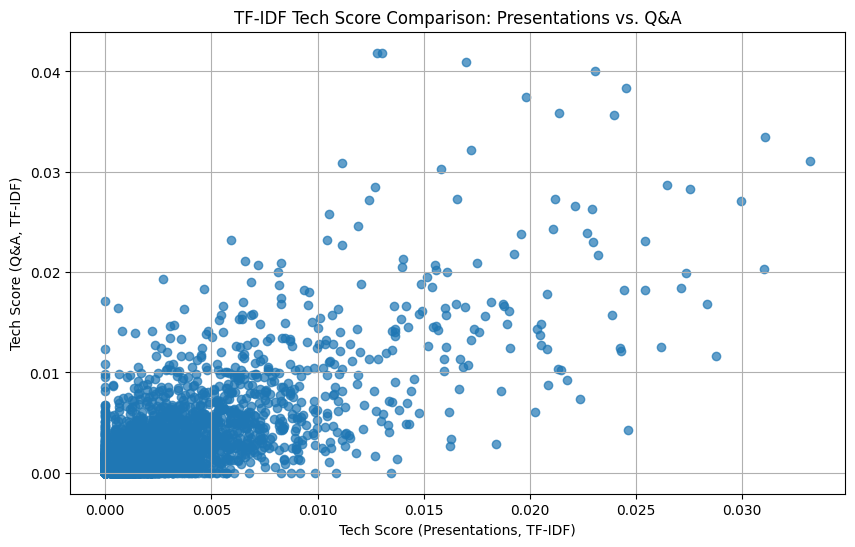

In [54]:
# Merge on file_name (or file_name and quarter if needed)
merged_scores = pd.merge(
    Pres[['file_name', 'tech_score_tfidf']], 
    Sample_answers[['file_name', 'tech_score_tfidf']], 
    on='file_name', 
    suffixes=('_pres', '_qa')
)

print("Merged DataFrame shape:", merged_scores.shape)
plt.figure(figsize=(10,6))
plt.scatter(merged_scores['tech_score_tfidf_pres'], merged_scores['tech_score_tfidf_qa'], alpha=0.7)
plt.xlabel("Tech Score (Presentations, TF-IDF)")
plt.ylabel("Tech Score (Q&A, TF-IDF)")
plt.title("TF-IDF Tech Score Comparison: Presentations vs. Q&A")
plt.grid(True)
plt.show()


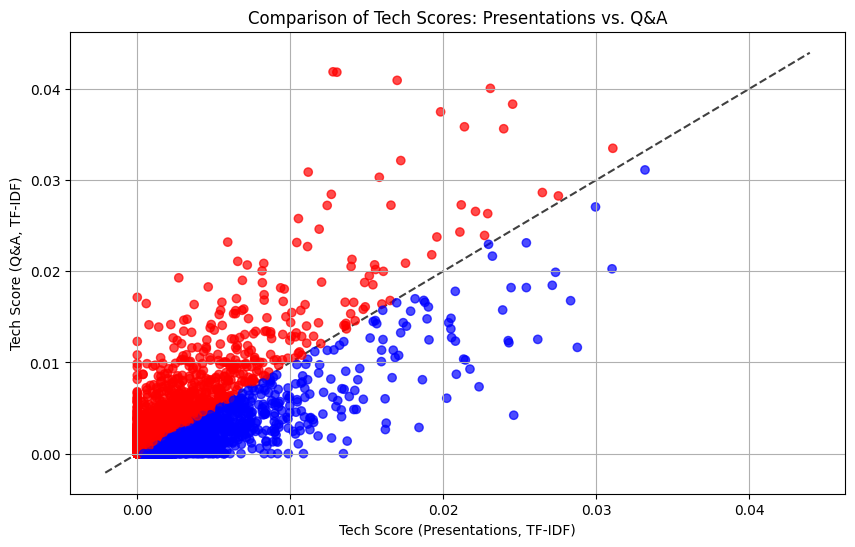

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Merge the datasets on 'file_name'
merged_scores = pd.merge(
    Pres[['file_name', 'tech_score_tfidf']], 
    Sample_answers[['file_name', 'tech_score_tfidf']], 
    on='file_name', 
    suffixes=('_pres', '_qa')
)

# Create a new column that assigns a color based on the condition:
# Blue if the presentation tech score is higher, red otherwise.
merged_scores['color'] = np.where(
    merged_scores['tech_score_tfidf_pres'] > merged_scores['tech_score_tfidf_qa'],
    'blue',
    'red'
)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    merged_scores['tech_score_tfidf_pres'], 
    merged_scores['tech_score_tfidf_qa'], 
    color=merged_scores['color'], 
    alpha=0.7
)

# Add a 45-degree reference line (y=x) to help visualize the balance between the two measures
lims = [
    np.min([plt.xlim()[0], plt.ylim()[0]]),  # min of both axes
    np.max([plt.xlim()[1], plt.ylim()[1]])   # max of both axes
]
plt.plot(lims, lims, 'k--', alpha=0.75, zorder=0)

plt.xlabel("Tech Score (Presentations, TF-IDF)")
plt.ylabel("Tech Score (Q&A, TF-IDF)")
plt.title("Comparison of Tech Scores: Presentations vs. Q&A")
plt.grid(True)
plt.show()


45-Degree Line (y = x):
Points that lie close to the line indicate that the tech scores from the presentations and Q&A are similar. This suggests that the level of discussion on technological disruption is comparable between the two sections.
Points Above the Line:
These points have a higher Q&A tech score than the presentation score (since the y-value is higher than the x-value). This may indicate that during the Q&A session, management addresses or is questioned more on technological disruption.
Points Below the Line:
Points here indicate that the presentation section has a higher tech score compared to the Q&A. This could imply that the management’s prepared remarks place more emphasis on technological disruption than what is discussed in the follow-up Q&A.
Color Coding:
In the example, points colored blue indicate that the presentation score is higher than the Q&A score, while red indicates the opposite. By observing the distribution of colors, you can quickly see if one section generally dominates the discussion on technological disruption.
This visualization not only helps compare the two measures but also provides insights into whether there is a systematic difference in how technological disruption is presented versus discussed interactively during Q&A sessions.

#### __1.2.C- Topic Modeling using LDA__

Idea:
Apply Latent Dirichlet Allocation (LDA) to extract topics from the transcripts. If one or more topics are clearly related to technological disruption, you can use the proportion of that topic in each document as your measure.
Step-by-Step:
Prepare the Corpus:
Use your preprocessed token lists (for example, the tokens column from your merged DataFrame).
Create a Gensim Dictionary and Corpus:
Convert the token lists into the format required by Gensim.
Train the LDA Model:
Choose the number of topics and train the model.
Identify Tech-Disruption Topics:
Inspect the topics and manually decide which ones reflect technological disruption.
Extract Topic Proportions:
For each document, extract the weight (proportion) of the tech-related topic(s).

In [38]:
import gensim
from gensim import corpora
import nltk

# Suppose Pres['tokens'] contains the tokenized words for each document
# Create a dictionary and corpus for LDA:
dictionary = corpora.Dictionary(Pres['tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in Pres['tokens']]

# Train an LDA model (e.g., with 10 topics)
lda_model = gensim.models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10, random_state=42)

# Inspect topics
for i, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {i}: {topic}")

# Let's say through inspection you decide that Topic 3 represents tech disruption
tech_topic = 3

# For each document, get the proportion of the tech-related topic
def get_topic_proportion(doc_bow, topic_num):
    topic_distribution = lda_model.get_document_topics(doc_bow)
    # Return the weight for the desired topic
    for topic, weight in topic_distribution:
        if topic == topic_num:
            return weight
    return 0

Pres['tech_score_lda'] = [get_topic_proportion(doc, tech_topic) for doc in corpus]

print(Pres[['file_name', 'tech_score_lda']].head())


Topic 0: 0.027*"quarter" + 0.022*"year" + 0.014*"million" + 0.008*"billion" + 0.008*"business" + 0.006*"growth" + 0.006*"net" + 0.006*"result" + 0.006*"loan" + 0.006*"basis"
Topic 1: 0.012*"year" + 0.011*"quarter" + 0.009*"million" + 0.009*"customer" + 0.008*"earnings" + 0.007*"business" + 0.007*"share" + 0.006*"result" + 0.006*"slide" + 0.006*"growth"
Topic 2: 0.021*"year" + 0.012*"revenue" + 0.010*"million" + 0.009*"quarter" + 0.009*"new" + 0.008*"billion" + 0.007*"gaap" + 0.006*"call" + 0.006*"game" + 0.005*"growth"
Topic 3: 0.020*"year" + 0.017*"quarter" + 0.016*"sale" + 0.013*"million" + 0.011*"growth" + 0.009*"business" + 0.008*"margin" + 0.007*"market" + 0.007*"cost" + 0.006*"basis"
Topic 4: 0.021*"quarter" + 0.015*"million" + 0.014*"year" + 0.008*"market" + 0.008*"growth" + 0.008*"revenue" + 0.007*"result" + 0.007*"product" + 0.006*"billion" + 0.006*"cash"
Topic 5: 0.017*"year" + 0.016*"quarter" + 0.011*"growth" + 0.007*"share" + 0.006*"brand" + 0.006*"first" + 0.006*"market" +

Discussion:
Advantages: This approach is unsupervised and may capture broader themes, including co-occurring words that together indicate disruption.
Limitations: Topic labeling is subjective, and the model might not clearly separate tech disruption from other themes unless tuned carefully.

#### __1.2.D - Embedding-Based Similarity Measures__

Idea:
Compute an average embedding for each transcript (using a Word2Vec or similar model), then measure its similarity to a reference vector that represents technological disruption. The reference vector can be created by averaging embeddings of a set of seed words related to tech disruption.
Step-by-Step:
Prepare Word Embeddings:
Either train a Word2Vec model on your corpus or use pre-trained embeddings. (Assume you already have a model.)
Create a Reference Vector:
Choose seed words (e.g., "innovation", "automation", "digital", "AI", "disruption") and compute their average embedding.
Compute Document Embeddings:
For each document, average the embeddings of the words (ignoring words not in the vocabulary).
Calculate Cosine Similarity:
Measure the cosine similarity between the document’s average embedding and the reference vector. Use that as your tech disruption measure.

In [42]:
sentences = Pres['tokens'].tolist()


In [43]:
from gensim.models import Word2Vec

# Assuming 'sentences' is a list of tokenized sentences from your corpus
model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4, sg=1)


In [45]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Suppose you have a trained Word2Vec model named 'w2v_model' (e.g., from gensim)
# And Pres['tokens'] contains your tokenized text

# Define seed words for technological disruption
seed_words = ['innovation', 'automation', 'digital', 'ai', 'disruption', 'technology']

# Create a reference vector (average embedding) for technological disruption:
def get_reference_vector(model, seed_words):
    vectors = []
    for word in seed_words:
        if word in model.wv:
            vectors.append(model.wv[word])
    return np.mean(vectors, axis=0) if vectors else None

reference_vector = get_reference_vector(model, seed_words)

# Define a function to compute the average embedding of a document:
def document_vector(model, tokens):
    # Filter tokens to include only those in the model vocabulary
    valid_tokens = [token for token in tokens if token in model.wv]
    if not valid_tokens:
        return np.zeros(model.vector_size)
    return np.mean([model.wv[token] for token in valid_tokens], axis=0)

# Compute the document vector for each transcript
Pres['doc_vector'] = Pres['tokens'].apply(lambda tokens: document_vector(model, tokens))

# Compute cosine similarity of each document vector to the reference vector
def compute_similarity(doc_vec, ref_vec):
    # Reshape vectors to 2D arrays for cosine_similarity
    return cosine_similarity(doc_vec.reshape(1, -1), ref_vec.reshape(1, -1))[0][0]

Pres['tech_score_embedding'] = Pres['doc_vector'].apply(lambda vec: compute_similarity(vec, reference_vector))

print(Pres[['file_name', 'tech_score_embedding']].head())


                                           file_name  tech_score_embedding
0  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...              0.500563
1  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...              0.509198
2  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...              0.501959
3  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...              0.545810
4  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...              0.556958



Advantages: This method captures semantic nuances by using word embeddings. It can pick up on synonyms and contextual cues beyond a fixed keyword list.
Limitations: Averaging embeddings ignores word order and may be sensitive to noise if the document has many irrelevant words. Additionally, the quality of the measure depends on the embedding model and the chosen seed words.

#### 1.1.B - Using Cosine Similarity

- Using Google's Word2Vec API model to find words related to "technological disruption

In [1]:
%%capture
!pip uninstall -y numpy gensim scipy smart-open
!pip install numpy==1.25.2 scipy gensim smart-open
# After this, restart the session (restart kernel, don't delete runtime)

In [1]:
# Loading Google's pre-trained Word2Vec model with 300-dimensional vector
import gensim.downloader as api
google_model = api.load("word2vec-google-news-300")

: 

- Finding words similar to the key terms to help build a vocabulary related to "technological disruption".

In [2]:
# What we will do is select a bunch of words based on their similarity with Technological Disruption and add them to our tech dictionnary
# First using: "most_similar" function of google_model
# Limit = we can use only one word
print(google_model.most_similar("technological", topn=5))

NameError: name 'google_model' is not defined

In [ ]:
print(google_model.most_similar("disruption", topn=5))

[('disruptions', 0.8658042550086975), ('interruption', 0.658836841583252), ('interruptions', 0.6469897627830505), ('distruption', 0.6304445862770081), ('disrupted', 0.6218001842498779)]


In [ ]:
print(google_model.most_similar("technological_innovations", topn=5))

[('innovations', 0.7695900797843933), ('technological_advances', 0.7287052869796753), ('technological_advancements', 0.7118793725967407), ('technological_advancement', 0.6809303760528564), ('technologies', 0.6743346452713013)]


In [ ]:
# Lets say we want to create a bag of words that are closely linked to technological disruption:
# We can select among these and add our proper words to create a dictionnary:

keywords = ["disruption","technological","interruption","advancement","innovation","ai","automation", "robotics", "technology"]

Computing Cosine Similarity mean of this vector

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# If we take the mean of all of these keywords in the model, and word with the cosine similarity:
tech_vectors = np.mean([google_model[word] for word in keywords if word in google_model], axis=0)

def compute_similarity(tokens):
    vectors = np.array([google_model[word] for word in tokens if word in google_model])
    if vectors.size == 0:
        return 0  # Aucun mot trouvé dans le modèle
    avg_vector = np.mean(vectors, axis=0)
    similarity = cosine_similarity([avg_vector], [tech_vectors])[0][0]
    return similarity

Pres['tech_disruption_score'] = Pres['tokens'].apply(compute_similarity) # affecting a score to each

Filtering Companies based on their score

In [ ]:
Pres = Pres.merge(Sample_EC[['file_name', 'co_conm']], on='file_name', how='left') # we merge the data to get the names of the companies

sorted_pres = Pres.sort_values(by='tech_disruption_score', ascending=False) # filtering by the disruption score

top_10 = sorted_pres[['file_name', 'co_conm', 'tech_disruption_score']].head(10)
bottom_10 = sorted_pres[['file_name', 'co_conm', 'tech_disruption_score']].tail(10)

In [ ]:
print("These are the Top 10 companies related to Technological Disruption:")
print(top_10)

print("\nThese are the Bottom 10 companies related to Technological Disruption:")
print(bottom_10)

These are the Top 10 companies related to Technological Disruption:
                                              file_name  \
2557  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2020...   
1948  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2019...   
446   Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2016...   
2805  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2020...   
2595  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2020...   
695   Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2017...   
780   Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2017...   
1996  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2019...   
1464  Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2018...   
510   Download ECC/SE/TRANSCRIPT/XMLStd/Archive/2017...   

                       co_conm  tech_disruption_score  
2557               NVIDIA CORP               0.597319  
1948                 ANSYS INC               0.596867  
446                NVIDIA CORP               0.591857  
2805               NVIDIA CORP               0.588900  
25

<b>Comments on this:</b>
- We see pure technological players (what we would expect actually): Nvidia, Synopsis (operating in the semiconductor field)
- But we also observe Netflix within the Bottom 10, even though it ictually is related to technological disruption.

Piste d'amélioration à ce niveau : améliorer la recherche des keywords ?

In [ ]:
# Calculer la similarité cosinus entre la moyenne des vecteurs des mots-clés et tous les mots du modèle
def get_most_similar_words_to_avg_vector(model, avg_vector, top_n=10):
    similarities = {}
    for word in model.index_to_key:  # Iterer sur tous les mots dans le modèle
        word_vector = model[word]
        similarity = cosine_similarity([avg_vector], [word_vector])[0][0]  # Calculer la similarité cosinus
        similarities[word] = similarity

    # Trier les mots en fonction de la similarité cosinus et obtenir les 'top_n' mots les plus proches
    sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return sorted_similarities[:top_n]

# Obtenir les 10 mots les plus proches de la moyenne des vecteurs des mots-clés
most_similar_words = get_most_similar_words_to_avg_vector(google_model, tech_vectors, top_n=10)

# Afficher les mots les plus similaires à la moyenne des mots-clés
print("Most similar words to the average of technological disruption keywords:")
for word, similarity in most_similar_words:
    print(f"{word}: {similarity}")

In [ ]:
import matplotlib.pyplot as plt

# Ajouter une colonne 'quarter' à partir de la date
Pres['quarter'] = pd.to_datetime(Sample_EC['date_rdq']).dt.to_period('Q')

# Agréger les scores de disruption technologique par trimestre
quarterly_scores = Pres.groupby('quarter')['tech_disruption_score'].mean()

# Tracer les résultats
plt.figure(figsize=(10, 6))
quarterly_scores.plot(kind='line')
plt.title("Technological Disruption Over Time")
plt.xlabel("Quarter")
plt.ylabel("Average Technological Disruption Score")
plt.grid(True)
plt.show()


In [ ]:
# 4. Explorer la réaction du marché (exemple avec des rendements boursiers)
# Remplacer par les rendements boursiers réels si disponibles dans le dataset
Pres['stock_return'] = Sample_EC['CAR-11-Carhart']  # Exemple d'une variable de rendement

# Calculer la corrélation entre les scores de disruption technologique et les rendements boursiers
correlation = Pres['tech_disruption_score'].corr(Pres['stock_return'])
print(f"Correlation between tech disruption score and stock return: {correlation}")

In [ ]:
import statsmodels.api as sm

# 1. Préparer les données pour la régression
# Dépendant : CAR-11-Carhart (rendement boursier, ou autre variable)
# Indépendant : tech_disruption_score (score de disruption technologique)

# Ajouter les rendements boursiers réels ou toute autre variable financière
Pres['stock_return'] = Sample_EC['CAR-11-Carhart']  # Remplacer par les rendements réels si disponibles

# Supprimer les valeurs manquantes pour éviter les erreurs dans la régression
Pres.dropna(subset=['tech_disruption_score', 'stock_return'], inplace=True)

# Variables indépendantes (score de disruption technologique)
X = Pres[['tech_disruption_score']]

# Variable dépendante (rendement boursier)
y = Pres['stock_return']

# Ajouter une constante à la matrice des variables indépendantes pour le modèle
X = sm.add_constant(X)

# S'assurer que les indices sont cohérents après suppression des valeurs manquantes
y = y.loc[X.index]

# Convertir les variables en numériques (si nécessaire)
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# 2. Ajuster le modèle de régression (modèle OLS)
ols_model = sm.OLS(y, X).fit()

# 3. Afficher le résumé de la régression
print(ols_model.summary())


In [ ]:
# R squared = 0 and non significance...

2 - Using Doc2Vec